<a href="https://colab.research.google.com/github/Codess129/Kaggle-Project/blob/master/Financial_Analysis_of_S%26P_500_(2020_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [3]:
import yfinance as yf
ticker = "^GSPC"
data = yf.Ticker(ticker)
hist = data.history(start="2020-11-18", end="2024-11-18")  # Specify date range
hist.to_csv("sp500_data.csv")

In [10]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2020-11-18 00:00:00-05:00 to 2024-11-15 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1005 non-null   float64
 1   High          1005 non-null   float64
 2   Low           1005 non-null   float64
 3   Close         1005 non-null   float64
 4   Volume        1005 non-null   int64  
 5   Dividends     1005 non-null   float64
 6   Stock Splits  1005 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 62.8 KB


# ***Historical Levels of the S&P 500 index***

<Axes: xlabel='Date'>

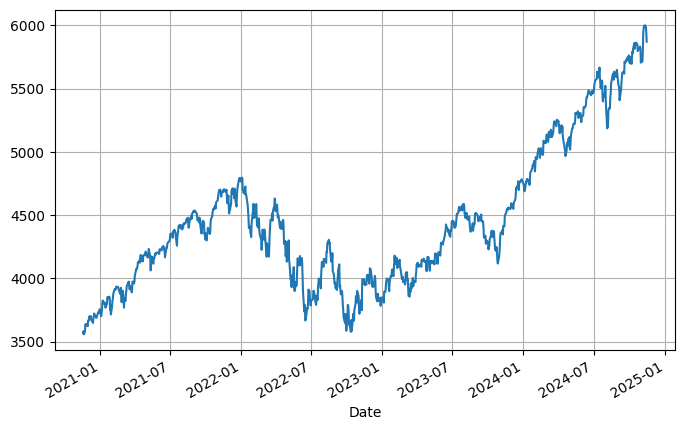

In [13]:
hist['Close'].plot(grid=True,figsize=(8, 5))

# *Moving Average for 42 trading days (2 month) and 252 trading days (1 year)*

In [4]:
hist['42d']= hist['Close'].rolling(window=42).mean().round(2)
hist['252d']=hist['Close'].rolling(window=252).mean().round(2)

In [5]:
hist[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2024-11-11 00:00:00-05:00,6001.350098,5778.44,5242.80
2024-11-12 00:00:00-05:00,5983.990234,5786.96,5249.02
2024-11-13 00:00:00-05:00,5985.379883,5795.35,5255.27
2024-11-14 00:00:00-05:00,5949.169922,5802.84,5261.04
2024-11-15 00:00:00-05:00,5870.620117,5808.85,5266.46


<Axes: xlabel='Date'>

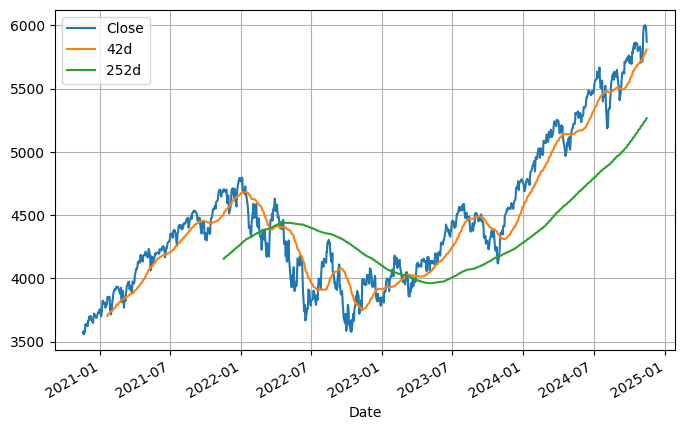

In [6]:
hist[['Close','42d','252d']].plot(grid=True,figsize=(8,5))

In [13]:
hist['42-252']=hist['42d']-hist['252d']
hist['42-252'].tail()

,42-252
Date,
2024-11-11 00:00:00-05:00,535.64
2024-11-12 00:00:00-05:00,537.94
2024-11-13 00:00:00-05:00,540.08
2024-11-14 00:00:00-05:00,541.80
2024-11-15 00:00:00-05:00,542.39


In [14]:
SD = 50
hist["Regime"] = np.where(hist['42-252'] > SD, 1, 0)
hist["Regime"] = np.where(hist['42-252'] < -SD, -1, hist["Regime"])

hist["Regime"].value_counts()


,count
Regime,
1,475
0,329
-1,201


In [16]:
hist['Market']=np.log(hist['Close']/hist['Close'].shift(1))
hist['Strategy']=hist['Regime'].shift(1)*hist['Market']


S&Ps 500 index vs investors wealth


<Axes: xlabel='Date'>

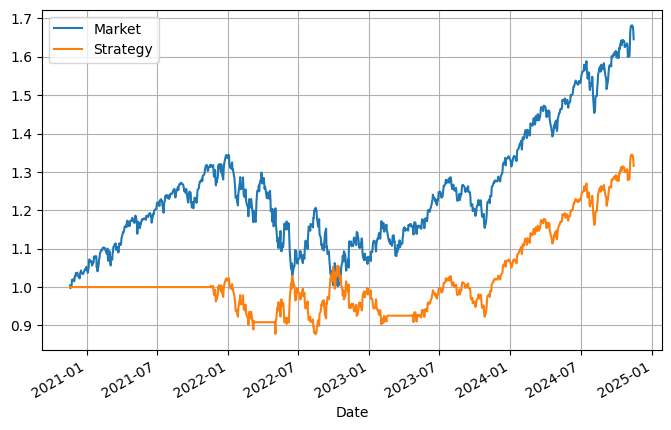

In [17]:
hist[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8,5))